# 读取xml格式标签

2020.5.31
导入ET，重要函数find，一层层获取节点

```
<annotation>
	<folder>1</folder>
	<filename>img_23.jpg</filename>
	<path>C:\Users\hwx594248\Desktop\1\img_23.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>500</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>一次性快餐盒</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>23</xmin>
			<ymin>67</ymin>
			<xmax>499</xmax>
			<ymax>427</ymax>
		</bndbox>
	</object>
</annotation>
```
这是一份示例xml代码，结构化读取其中数据

In [1]:
import xml.etree.ElementTree as ET

In [2]:
def parse_label(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    image_name = root.find('filename').text
    
    category = []
    xmin = []
    xmax = []
    ymin = []
    ymax = []
    
    for object in root.findall('object'):
        for x in object.iter('name'):
            category.append(x.text)
            xmax.append(object.find('bndbox').find('xmax').text)
            ymax.append(object.find('bndbox').find('ymax').text)
            xmin.append(object.find('bndbox').find('xmin').text)
            ymin.append(object.find('bndbox').find('ymin').text)
    
    #列表组合
    ground_truth_box = [list(box) for box in zip(xmin,ymin,xmax,ymax)]
    
    return image_name,(width,height),category,ground_truth_box

In [3]:
import glob
for name in glob.glob('./Annotations/*'):
    print(parse_label(name),'\n')

('1.jpg', ('2560', '1920'), ['diaowei'], [['83', '1326', '2532', '1407']]) 

('10.jpg', ('2560', '1920'), ['maoban'], [['1045', '894', '1249', '1068']]) 

('11.jpg', ('2560', '1920'), ['maoban', 'maoban', 'maoban', 'maoban'], [['1303', '1074', '1459', '1174'], ['1327', '812', '1469', '904'], ['1401', '442', '1691', '598'], ['1387', '134', '1735', '264']]) 

('12.jpg', ('2560', '1920'), ['maoban'], [['1191', '670', '1289', '772']]) 

('13.jpg', ('2560', '1920'), ['diaowei'], [['25', '710', '2035', '854']]) 

('14.jpg', ('2560', '1920'), ['maoban'], [['1371', '390', '1489', '542']]) 

('15.jpg', ('2560', '1920'), ['maoban'], [['867', '578', '969', '686']]) 

('16.jpg', ('2560', '1920'), ['diaowei'], [['1021', '850', '2001', '978']]) 

('17.jpg', ('2560', '1920'), ['zhadong'], [['805', '204', '2055', '1204']]) 

('18.jpg', ('2560', '1920'), ['maoban'], [['1083', '622', '1181', '690']]) 

('19.jpg', ('2560', '1920'), ['maoban'], [['585', '334', '681', '444']]) 

('2.jpg', ('2560', '1920'),

# 保存json格式文件，即赛题所需输出
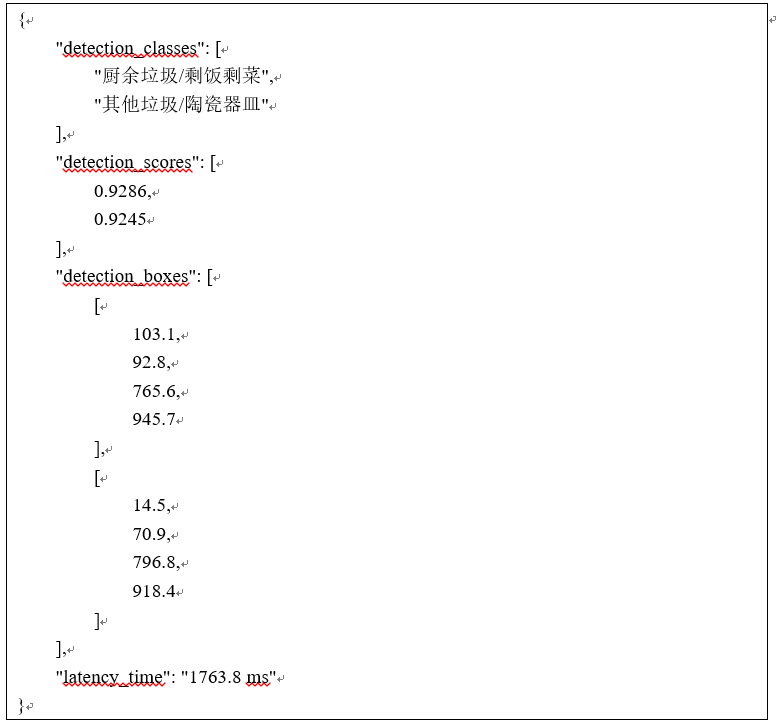

json格式保存主要使用json.dump()，保存的是一个字典
从赛方要求可以看出，字典key包含4个

In [8]:
import json

In [19]:
#写入result.json
result={}
result['detection_classes'] = ["厨余垃圾/剩饭剩菜","其他垃圾/陶瓷器皿"]
result['detection_scores'] = [0.9286,0.9245]
result['detection_boxes'] = [[103.1,92.8,765.6,945.7],[14.5,70.9,796.8,918.4]]
result['latency_time'] = "1762.8ms"

with open('./result.json','w') as f:
    #设置indent=4为了实现所需可视化输出效果
    json.dump(result,f,indent=4)

In [23]:
#读取验证
with open('./result.json','r') as f:
    data = json.load(f)
    print(data)

{'detection_classes': ['厨余垃圾/剩饭剩菜', '其他垃圾/陶瓷器皿'], 'detection_scores': [0.9286, 0.9245], 'detection_boxes': [[103.1, 92.8, 765.6, 945.7], [14.5, 70.9, 796.8, 918.4]], 'latency_time': '1762.8ms'}


显示效果入下图：
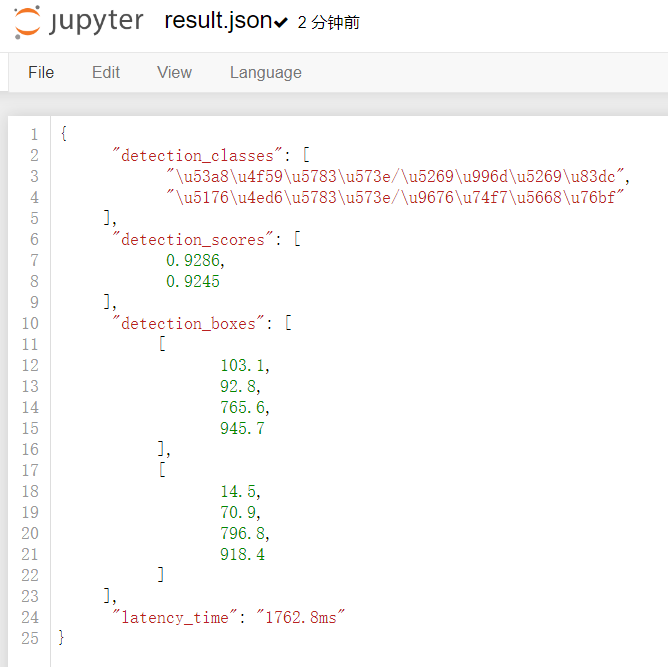